In [1]:
## Logistic regression(Binary classification)Example
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We are importing a dataset which includes values of two types of test on microchip and whether microchip is  useable or not.

In [2]:
data=pd.read_csv('ex2data2.txt',header=None)
data.head()
## Below is example of the way to load the file with path 
# data.to_csv(r'C:\Users\Ramendra\Desktop\Data Analysis Theory\clgAdmission.csv')

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
X=data.iloc[:,[0,1]]
X

,0,1
0,0.051267,0.699560
1,-0.092742,0.684940
2,-0.213710,0.692250
3,-0.375000,0.502190
4,-0.513250,0.465640
5,-0.524770,0.209800
6,-0.398040,0.034357
7,-0.305880,-0.192250
8,0.016705,-0.404240
9,0.131910,-0.513890


In [4]:
Y=data.iloc[:,2]
Y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
111    0
112    0
113    0
114    0
115    0
116    0
117    0
Name: 2, Length: 118, dtype: int64

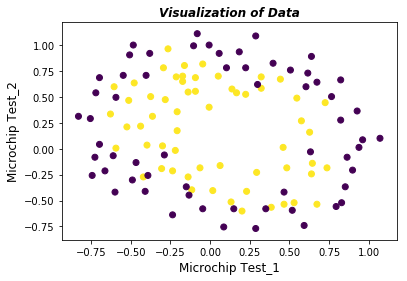

In [5]:
plt.scatter(X[0],X[1],c=Y)
plt.title('Visualization of Data',fontsize=12,style='italic',fontweight='bold')
plt.xlabel('Microchip Test_1',fontsize=12)
plt.ylabel('Microchip Test_2',fontsize=12)
plt.show()

### Polynomial feature Mapping
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
poly = PolynomialFeatures(6)
X1=poly.fit_transform(X)
X1.shape

(118, 28)

### Logistic Regression Library
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
clf = LogisticRegression(random_state=42, solver='lbfgs',multi_class='multinomial')
clf.fit(X1,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
##clf.predict([[45,85]])

ValueError: X has 2 features per sample; expecting 28

In [12]:
clf.score(X1, Y)

0.8220338983050848

In [17]:
#x0.ravel()

array([-1.        , -0.97727273, -0.95454545, ...,  1.20454545,
        1.22727273,  1.25      ])

In [18]:
#x1.ravel()

array([-1.  , -1.  , -1.  , ...,  1.25,  1.25,  1.25])

In [19]:
#np.c_[x0.ravel(), x1.ravel()]

array([[-1.        , -1.        ],
       [-0.97727273, -1.        ],
       [-0.95454545, -1.        ],
       ...,
       [ 1.20454545,  1.25      ],
       [ 1.22727273,  1.25      ],
       [ 1.25      ,  1.25      ]])

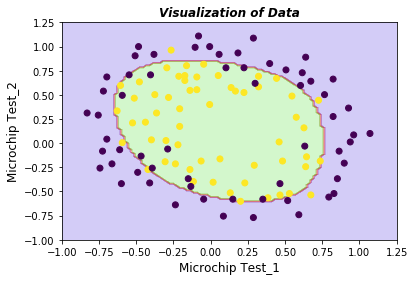

In [16]:
## Now plotting all dataset with decision boundary
axes=[-1, 1.25, -1, 1.25]
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
XX = np.c_[x0.ravel(), x1.ravel()]
XX1=poly.fit_transform(XX)
y_pred = clf.predict(XX1).reshape(x0.shape)
#plt.plot(x0, x1, c=y_pred)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2) ##  OR > plt.scatter(x0, x1, c=y_pred)
###
plt.scatter(X[0],X[1],c=Y)
plt.title('Visualization of Data',fontsize=12,style='italic',fontweight='bold')
plt.xlabel('Microchip Test_1',fontsize=12)
plt.ylabel('Microchip Test_2',fontsize=12)
plt.show()

#### Happy Learning ! Best of Luck!!'
#### Do it with Passion or not at all !!!